GitHub Link: https://github.com/muhammetbolat/ITU_ComputerVision_HW1

I uploaded the codes in the repository. I'm trying to explain what I did belows.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import filters
from skimage import util
from numpy.fft import fft, fft2, fftshift, ifft, ifft2
from scipy.signal import convolve2d as conv2d

### 1. Download the “Sunny Lake” image.

I downloaded the 'SunnyLake.bmp' image in the same directory.

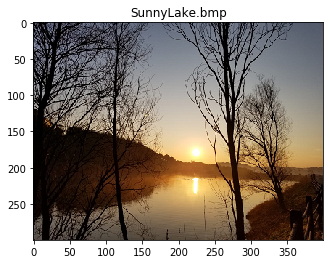

In [2]:
imageName = 'SunnyLake.bmp'
Image = plt.imread(imageName)
plt.figure('SunnyLake')
plt.title('SunnyLake.bmp')
plt.imshow(Image)
#plt.savefig('SunnyLake.jpg')

### 2. Obtain the gray scale image, I, by taking the average values of R, G, B channels.

The image has 3 dimensions which are Red, Green and Blue. It is added and divided by 3. The result is still integer.
<br/> The grayscale image is assigned to I.

In [3]:
Image.shape

(300, 400, 3)

In [4]:
I = np.sum(Image, axis=2)
I = I // 3

I image has only 1 dimension.

In [5]:
I.shape

(300, 400)

You can see the grayscale image below.

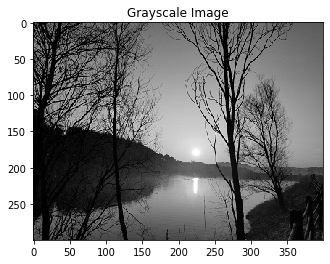

In [6]:
plt.title('Grayscale Image')
plt.imshow(I, cmap='gray')
#plt.savefig('grayscale.jpg')

### 3. Obtain the histogram, h, of the gray scale image, I.

The histogram is assigned to h. You can see the result.

In [7]:
h = I.ravel()

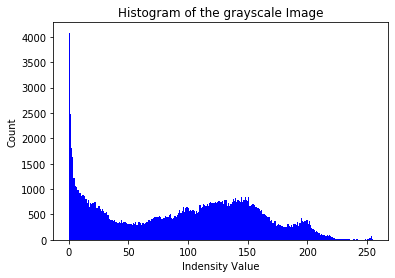

<Figure size 432x288 with 0 Axes>

In [8]:
_ = plt.hist(h, bins=256, color = 'blue')
_ = plt.xlabel('Indensity Value')
_ = plt.ylabel('Count')
_ = plt.title('Histogram of the grayscale Image')
plt.show()
plt.savefig('histogram.jpg')

### 4. Inspect h and propose a threshold value, T, to segment the image into two parts and hence obtain a binary image,  B

<br/>i. Part I: Pixels with intensity values above T.
<br/>ii. Part II: Pixels with intensity values below T.

As you can see the the result above. We can choose T as 100. Let's check what we will get.

In [9]:
T = 100

In [10]:
print("There are {} pixels above T.".format(len(I[I[I > T]])))
print("There are {} pixels below T.".format(len(I[I[I <= T]])))

There are 59803 pixels above T.
There are 60197 pixels below T.


As you can see the result above, T is middle value to set as threshold.

In [11]:
I = I.astype(np.uint8)

We get the binary image as B.

In [12]:
(_, B) = cv2.threshold(I, 100, 255, cv2.THRESH_BINARY)

### 5. Present the output image B.

You can see the result below.

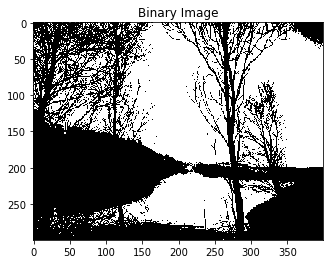

In [13]:
plt.title('Binary Image')
plt.imshow(B, cmap='gray')
#plt.savefig('binaryimage.jpg')

### 6. Add the following zero mean Gaussian noises, separately to red, green and blue channels of 256x256 colored "Sunny Lake" image, with standard deviations of 1, 5, 10, 20. Show resulting images

I get the red, green and blue channel.

In [14]:
red = Image[:,:, 0]
green = Image[:,:, 1]
blue = Image[:,:, 2]

I define a method which add gause noise. It has 3 parameters. 
<br/> 1. Image Data
<br/> 2. Standard Deviation
<br/> 3. mean

In [15]:
def gaussNoise(image, std, mean=0):
    row, col = image.shape
    mean = mean
    sigma = std
    gauss = np.random.normal(mean, sigma, (row, col))
    gauss = gauss.reshape(row, col)
    noisy = image + gauss
    noisy = noisy.astype('int')
    
    row, column = noisy.shape
    for i in range(row):
        for j in range(column):
            if noisy[i, j] < 0:
                noisy[i, j] = 0
            elif noisy[i, j] > 255:
                noisy[i, j] = 255
    
    return noisy.astype('uint8')

#### Standard Deviation = 1

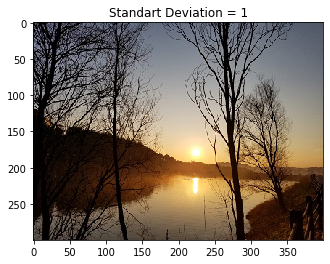

In [16]:
std = 1

l_1 = np.zeros_like(Image)
red_noisy = gaussNoise(red, std)
green_noisy = gaussNoise(green, std)
blue_noisy = gaussNoise(blue, std)

l_1[:, :, 0] = red_noisy
l_1[:, :, 1] = green_noisy
l_1[:, :, 2] = blue_noisy

plt.title('Standart Deviation = 1')
plt.imshow(l_1)
plt.savefig('std_1.jpg')

#### Standard Deviation = 5

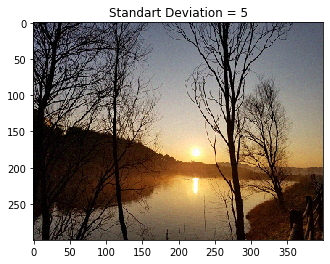

In [17]:
std = 5

l_5 = np.zeros_like(Image)
red_noisy = gaussNoise(red, std)
green_noisy = gaussNoise(green, std)
blue_noisy = gaussNoise(blue, std)

l_5[:, :, 0] = red_noisy
l_5[:, :, 1] = green_noisy
l_5[:, :, 2] = blue_noisy

plt.title('Standart Deviation = 5')
plt.imshow(l_5)
plt.savefig('std_5.jpg')

#### Standard Deviation = 10

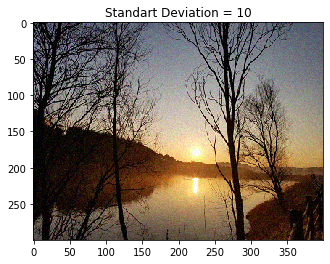

In [18]:
std = 10

l_10 = np.zeros_like(Image)
red_noisy = gaussNoise(red, std)
green_noisy = gaussNoise(green, std)
blue_noisy = gaussNoise(blue, std)

l_10[:, :, 0] = red_noisy
l_10[:, :, 1] = green_noisy
l_10[:, :, 2] = blue_noisy

plt.title('Standart Deviation = 10')
plt.imshow(l_10)
plt.savefig('std_10.jpg')

#### Standard Deviation = 20

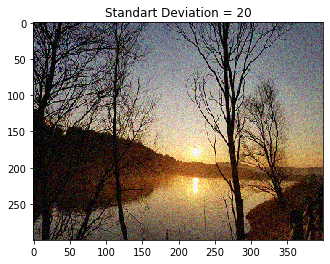

In [19]:
std = 20

l_20 = np.zeros_like(Image)
red_noisy = gaussNoise(red, std)
green_noisy = gaussNoise(green, std)
blue_noisy = gaussNoise(blue, std)

l_20[:, :, 0] = red_noisy
l_20[:, :, 1] = green_noisy
l_20[:, :, 2] = blue_noisy

plt.title('Standart Deviation = 20')
plt.imshow(l_20)
plt.savefig('std_20.jpg')

### 7. Obtain gray scale images, I_1, I_5, I_10 and I_20 by taking the average values of R, G, B channels corresponding to different noise levels.

The image has 3 dimensions which are Red, Green and Blue. It is added and divided by 3. The result is still integer.

In [20]:
l_1 = np.sum(l_1, axis=2)
l_5 = np.sum(l_5, axis=2)
l_10 = np.sum(l_10, axis=2)
l_20 = np.sum(l_20, axis=2)

l_1 = l_1 // 3
l_5 = l_5 // 3
l_10 = l_10 // 3
l_20 = l_20 // 3

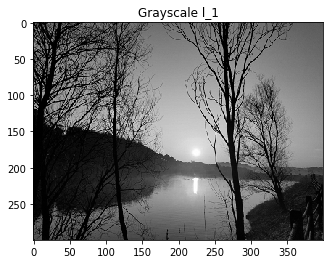

In [21]:
plt.title('Grayscale l_1')
plt.imshow(l_1, cmap='gray')
plt.savefig('Grayscale-l_1.jpg')

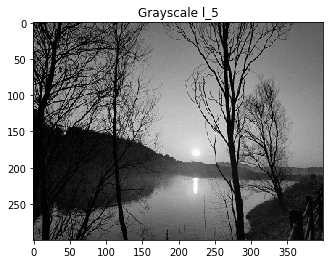

In [22]:
plt.title('Grayscale l_5')
plt.imshow(l_5, cmap='gray')
plt.savefig('Grayscale-l_5.jpg')

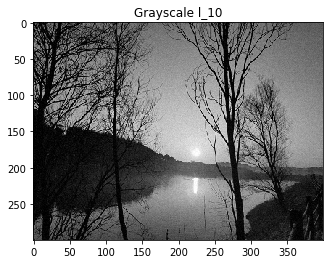

In [23]:
plt.title('Grayscale l_10')
plt.imshow(l_10, cmap='gray')
plt.savefig('Grayscale-l_10.jpg')

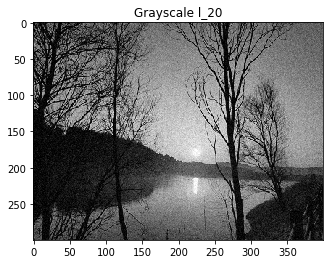

In [24]:
plt.title('Grayscale l_20')
plt.imshow(l_20, cmap='gray')
plt.savefig('Grayscale-l_20.jpg')

### 8. Filter these images using low-pass filters with kernels presented on pages 9 and 12 of “filter.pdf” document. Comment on the results.

According to the filter.pdf, there are 3 low-pass filter. They are named h1, h2, h_gauss 

In [25]:
h1 = np.array([[1, 1, 1], 
               [1, 1, 1], 
               [1, 1, 1]]) / 9

h2 = np.array([[1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1]]) / 25

h_gauss = np.array([[1, 2, 1], 
                    [2, 4, 2],
                    [1, 2, 1]])

##### L_1 Image for all Low Pass Filter

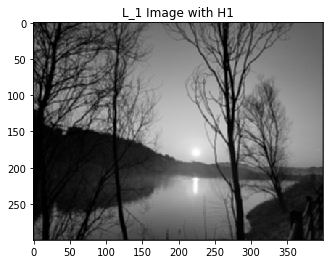

In [26]:
L_1_H1 = conv2d(l_1, h1, mode='same', boundary='fill', fillvalue=0)
L_1_H2 = conv2d(l_1, h2, mode='same', boundary='fill', fillvalue=0)
L_1_H_GAUSS = conv2d(l_1, h_gauss, mode='same', boundary='fill', fillvalue=0)

plt.title('L_1 Image with H1')
plt.imshow(L_1_H1, cmap='gray')
plt.savefig('L_1_Image_With_H1.jpg')

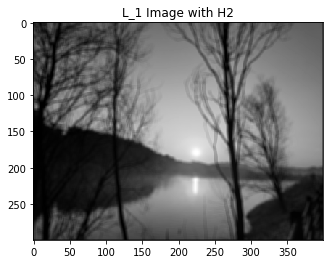

In [27]:
plt.title('L_1 Image with H2')
plt.imshow(L_1_H2, cmap='gray')
plt.savefig('L_1_Image_With_H2.jpg')

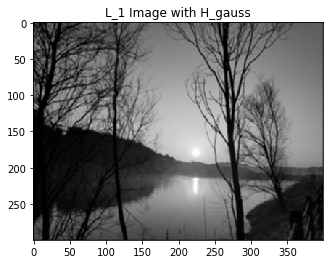

In [28]:
plt.title('L_1 Image with H_gauss')
plt.imshow(L_1_H_GAUSS, cmap='gray')
plt.savefig('L_1_Image_With_H_gauss.jpg')

##### L_5 Image for all Low Pass Filter

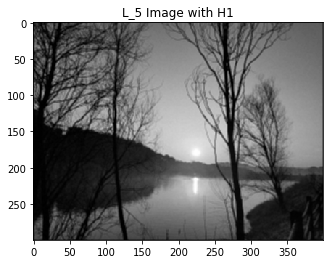

In [29]:
L_5_H1 = conv2d(l_5, h1, mode='same', boundary='fill', fillvalue=0)
L_5_H2 = conv2d(l_5, h2, mode='same', boundary='fill', fillvalue=0)
L_5_H_GAUSS = conv2d(l_5, h_gauss, mode='same', boundary='fill', fillvalue=0)

plt.title('L_5 Image with H1')
plt.imshow(L_5_H1, cmap='gray')
plt.savefig('L_5_Image_With_H1.jpg')

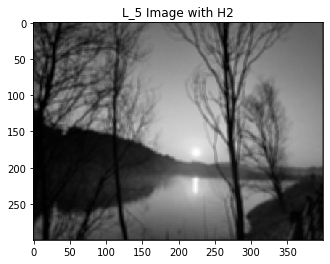

In [30]:
plt.title('L_5 Image with H2')
plt.imshow(L_5_H2, cmap='gray')
plt.savefig('L_5_Image_With_H2.jpg')

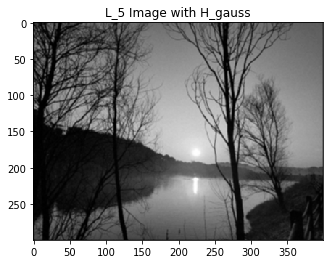

In [31]:
plt.title('L_5 Image with H_gauss')
plt.imshow(L_5_H_GAUSS, cmap='gray')
plt.savefig('L_5_Image_With_H_gauss.jpg')

##### L_10 Image for all Low Pass Filter

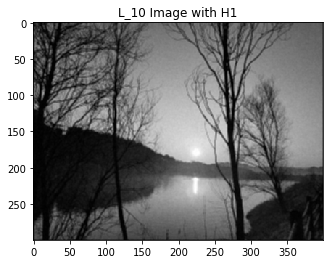

In [32]:
L_10_H1 = conv2d(l_10, h1, mode='same', boundary='fill', fillvalue=0)
L_10_H2 = conv2d(l_10, h2, mode='same', boundary='fill', fillvalue=0)
L_10_H_GAUSS = conv2d(l_10, h_gauss, mode='same', boundary='fill', fillvalue=0)

plt.title('L_10 Image with H1')
plt.imshow(L_10_H1, cmap='gray')
plt.savefig('L_10_Image_With_H1.jpg')

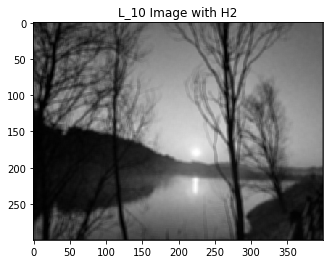

In [33]:
plt.title('L_10 Image with H2')
plt.imshow(L_10_H2, cmap='gray')
plt.savefig('L_10_Image_With_H2.jpg')

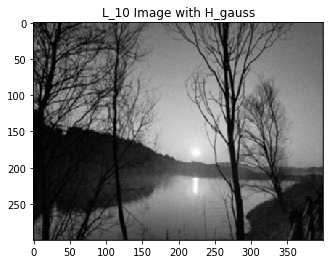

In [34]:
plt.title('L_10 Image with H_gauss')
plt.imshow(L_10_H_GAUSS, cmap='gray')
plt.savefig('L_10_Image_With_H_gauss.jpg')

##### L_20 Image for all Low Pass Filter

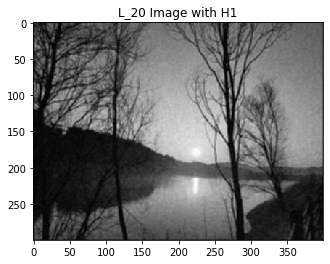

In [35]:
L_20_H1 = conv2d(l_20, h1, mode='same', boundary='fill', fillvalue=0)
L_20_H2 = conv2d(l_20, h2, mode='same', boundary='fill', fillvalue=0)
L_20_H_GAUSS = conv2d(l_20, h_gauss, mode='same', boundary='fill', fillvalue=0)

plt.title('L_20 Image with H1')
plt.imshow(L_20_H1, cmap='gray')
plt.savefig('L_20_Image_With_H1.jpg')

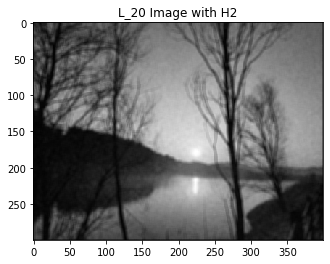

In [36]:
plt.title('L_20 Image with H2')
plt.imshow(L_20_H2, cmap='gray')
plt.savefig('L_20_Image_With_H2.jpg')

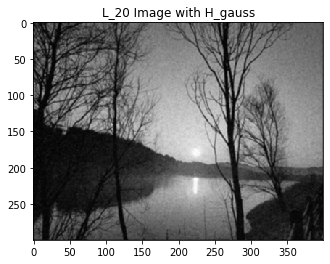

In [37]:
plt.title('L_20 Image with H_gauss')
plt.imshow(L_20_H_GAUSS, cmap='gray')
plt.savefig('L_20_Image_With_H_gauss.jpg')

### 9. Filter images in 7) using high-pass filters with kernels presented on pages 17 and 19 of “filter.pdf” document. Comment on the results.

We have 3 kernels as high pass filters. They are named as h1, h2 and h3.

In [38]:
A = 1
h1 = np.array([[-1, -1, -1], [-1, 9*A -1, -1], [-1, -1, -1]])

h2 = np.array([[0.17, 0.67, 0.17], [0.67, -3.33, 0.67], [0.17, 0.67, 0.17]])

#high boost filter.
A = 1.5
h3 = np.array([[-1, -1, -1], [-1, 9*A -1, -1], [-1, -1, -1]])

Laplacian filter(A=1) passes higher frequencies. That’s why it should be useful to see edges of the image. As you remember we added normal distrubited noise which is defined by sigma. If the sigma is low, Laplacian filter should be useful to eleminate noises.


##### L_1 Image for all High Pass Filter

In [39]:
L_1_H1 = conv2d(l_1, h1, mode='same', boundary='fill', fillvalue=0)
L_1_H2 = conv2d(l_1, h2, mode='same', boundary='fill', fillvalue=0)
L_1_H3 = conv2d(l_1, h3, mode='same', boundary='fill', fillvalue=0)

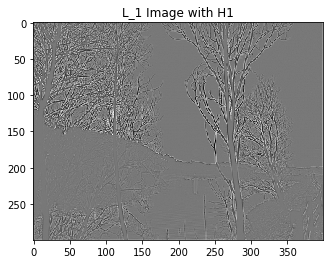

In [40]:
plt.title('L_1 Image with H1')
plt.imshow(L_1_H1, cmap='gray')
plt.savefig('L_1_Image_With_H1.jpg')

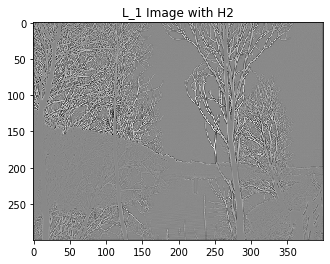

In [41]:
plt.title('L_1 Image with H2')
plt.imshow(L_1_H2, cmap='gray')
plt.savefig('L_1_Image_With_H2.jpg')

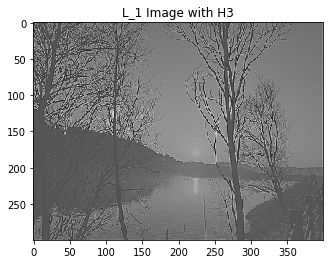

In [42]:
plt.title('L_1 Image with H3')
plt.imshow(L_1_H3, cmap='gray')
plt.savefig('L_1_Image_With_H3.jpg')

You can see the results, If we increment A, Cutoff frequency decreases, it means more frequencies are passed to the filter. High Boosts filter passes more frequencies than other HPFs.

##### L_5 Image for all High Pass Filter

In [43]:
L_5_H1 = conv2d(l_5, h1, mode='same', boundary='fill', fillvalue=0)
L_5_H2 = conv2d(l_5, h2, mode='same', boundary='fill', fillvalue=0)
L_5_H3 = conv2d(l_5, h3, mode='same', boundary='fill', fillvalue=0)

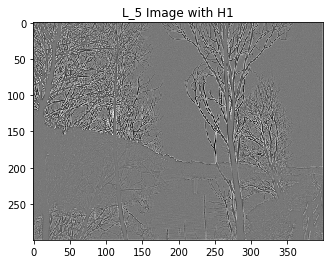

In [44]:
plt.title('L_5 Image with H1')
plt.imshow(L_5_H1, cmap='gray')
plt.savefig('L_5_Image_With_H1.jpg')

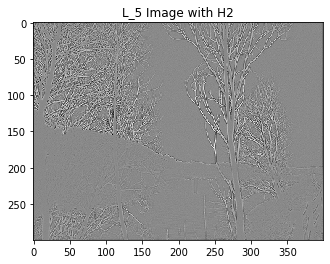

In [45]:
plt.title('L_5 Image with H2')
plt.imshow(L_5_H2, cmap='gray')
plt.savefig('L_5_Image_With_H2.jpg')

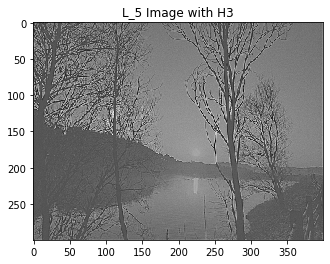

In [46]:
plt.title('L_5 Image with H3')
plt.imshow(L_5_H3, cmap='gray')
plt.savefig('L_5_Image_With_H3.jpg')

##### L_10 Image for all High Pass Filter

In [47]:
L_10_H1 = conv2d(l_10, h1, mode='same', boundary='fill', fillvalue=0)
L_10_H2 = conv2d(l_10, h2, mode='same', boundary='fill', fillvalue=0)
L_10_H3 = conv2d(l_10, h3, mode='same', boundary='fill', fillvalue=0)

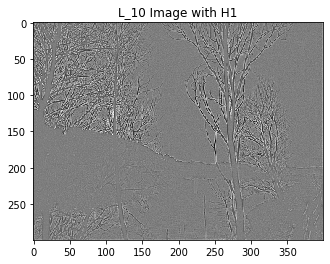

In [48]:
plt.title('L_10 Image with H1')
plt.imshow(L_10_H1, cmap='gray')
plt.savefig('L_10_Image_With_H1.jpg')

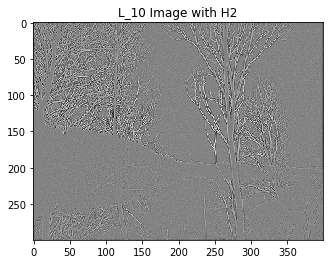

In [49]:
plt.title('L_10 Image with H2')
plt.imshow(L_10_H2, cmap='gray')
plt.savefig('L_10_Image_With_H2.jpg')

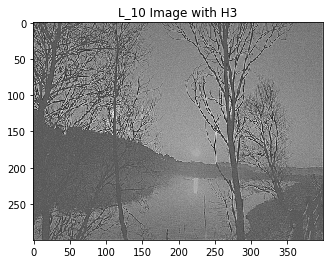

In [50]:
plt.title('L_10 Image with H3')
plt.imshow(L_10_H3, cmap='gray')
plt.savefig('L_10_Image_With_H3.jpg')

##### L_20 Image for all High Pass Filter

In [51]:
L_20_H1 = conv2d(l_20, h1, mode='same', boundary='fill', fillvalue=0)
L_20_H2 = conv2d(l_20, h2, mode='same', boundary='fill', fillvalue=0)
L_20_H3 = conv2d(l_20, h3, mode='same', boundary='fill', fillvalue=0)

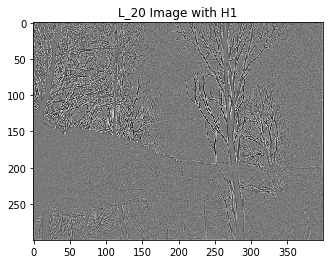

In [52]:
plt.title('L_20 Image with H1')
plt.imshow(L_20_H1, cmap='gray')
plt.savefig('L_20_Image_With_H1.jpg')

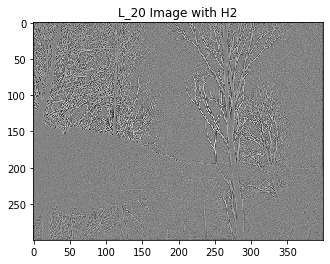

In [53]:
plt.title('L_20 Image with H2')
plt.imshow(L_20_H2, cmap='gray')
plt.savefig('L_20_Image_With_H2.jpg')

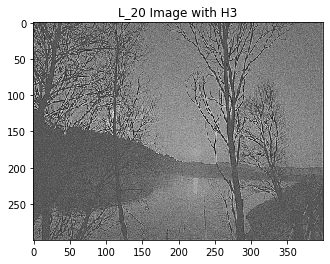

In [54]:
plt.title('L_20 Image with H3')
plt.imshow(L_20_H3, cmap='gray')
plt.savefig('L_20_Image_With_H3.jpg')

### 10.Inspect Figure-1. Comment on the type of noise and propose a method to de-noise the image. Implement your method and present the de-noised image.

In [55]:
noisy_image = plt.imread('Figure_1.png')

In [93]:
noisy_image = noisy_image[:, :, 0:3]

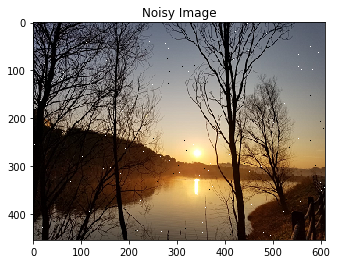

In [101]:
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.show()

Let's invest the characteristics of the noise, I can see white and black spots. That's <b>salt and pepper</b> noise.

Median filter(non-linear) looks like one of the best option to eleminate noises.

In [102]:
median = cv2.medianBlur(noisy_image, 5)
compare = np.concatenate((noisy_image, median), axis=1) #side by side comparison

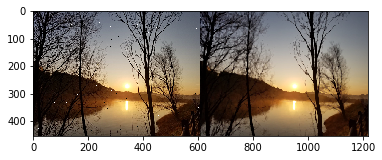

<Figure size 432x288 with 0 Axes>

In [105]:
plt.imshow(compare)
plt.show()
plt.savefig('Figure_cleared.jpg')